In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import numpy as np
from tqdm.notebook import tqdm

from src.hopfield_network import HopfieldNetwork, _predict_batch, _predict_sequential, _get_energy

## 3.0 Hopfield network recall

In [2]:
x1 = np.array([-1,-1,1,-1,1,-1,-1,1], dtype=float)
x2 = np.array([-1,-1,-1,-1,-1,1,-1,-1], dtype=float)
x3 = np.array([-1,1,1,-1,-1,1,-1,1], dtype=float)

In [3]:
patterns = np.array([x1,x2,x3])

In [4]:
print(patterns)

[[-1. -1.  1. -1.  1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1.  1.  1. -1. -1.  1. -1.  1.]]


In [5]:
network = HopfieldNetwork(max_iterations = 1)

In [6]:
network.fit(patterns, patterns)

results = network.predict(patterns)

for x in range(len(patterns)):
  print("Old pattern was ", patterns [x]," updated pattern is ", results[x])
  if (np.array_equal(patterns [x],results[x])):
    print("Patterns are equal.")

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  updated pattern is  [-1 -1  1 -1  1 -1 -1  1]
Patterns are equal.
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  updated pattern is  [-1 -1 -1 -1 -1  1 -1 -1]
Patterns are equal.
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  updated pattern is  [-1  1  1 -1 -1  1 -1  1]
Patterns are equal.


## 3.1 Convergence and attractors
Can the memory recall the stored patterns from distorted inputs patterns? Define a few new patterns which are distorted versions of the original ones:

x1d=[ 1 -1 1 -1 1 -1 -1 1]

x2d=[ 1 1 -1 -1 -1 1 -1 -1]

x3d=[ 1 1 1 -1 1 1 -1 1]

x1d has a one bit error, x2d and x3d have two bit errors.

#### Apply the update rule repeatedly until you reach a stable fixed point. Did all the patterns converge towards stored patterns?

In [7]:
x1d = np.array([1,-1,1,-1,1,-1,-1,1])
x2d = np.array([1,1,-1,-1,-1,1,-1,-1])
x3d = np.array([1,1,1,-1,1,1,-1,1])

In [8]:
patterns_d = patterns_distorded = np.array([x1d,x2d,x3d])

In [9]:
network = HopfieldNetwork()

In [10]:
network.fit(patterns, patterns)

results = network.predict(patterns_d)

for x in range(len(patterns)):
  print("The input patterns is ", patterns_d[x]," , the correct pattern was ", patterns[x], " and the resulting pattern is", results[x])
  if (np.array_equal(patterns[x], results[x])):
    print("Resulting and old patterns are equal.")
  else:
        print("Resulting and old patterns are not equal.")

The input patterns is  [ 1 -1  1 -1  1 -1 -1  1]  , the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the resulting pattern is [-1 -1  1 -1  1 -1 -1  1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1 -1 -1 -1  1 -1 -1]  , the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  and the resulting pattern is [-1 -1 -1 -1 -1  1 -1 -1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1  1 -1  1  1 -1  1]  , the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the resulting pattern is [-1  1  1 -1 -1  1 -1  1]
Resulting and old patterns are equal.


All distorted patterns are updated back to the original ones.

In [11]:
network = HopfieldNetwork(max_iterations=3, prediction_method="sequential")

In [12]:
network.fit(patterns, patterns)

results = network.predict(patterns_d)

for x in range(len(patterns)):
  print("The input patterns is ", patterns_d[x]," , the correct pattern was ", patterns[x], " and the resulting pattern is", results[x])
  if (np.array_equal(patterns[x], results[x])):
    print("Resulting and old patterns are equal.")
  else:
        print("Resulting and old patterns are not equal.")

The input patterns is  [ 1 -1  1 -1  1 -1 -1  1]  , the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the resulting pattern is [-1 -1  1 -1  1 -1 -1  1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1 -1 -1 -1  1 -1 -1]  , the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  and the resulting pattern is [-1 -1 -1 -1 -1  1 -1 -1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1  1 -1  1  1 -1  1]  , the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the resulting pattern is [-1 -1  1 -1  1 -1 -1  1]
Resulting and old patterns are not equal.


#### How many attractors are there in this network?

In [13]:
# Creation of the set of all combinations of patterns
all_patterns = np.array([np.array(i) for i in itertools.product([-1, 1], repeat=8)])

In [14]:
# For each combination, find the fixed point
network = HopfieldNetwork(max_iterations = 3, prediction_method = "sequential")

network.fit(patterns, patterns)

results = network.predict(all_patterns)

In [15]:
attractors = np.unique(results, axis=0)
occurences = np.zeros(len(attractors))
index = 0
for attractor in attractors:
    for i in range(len(results)):
        if np.array_equal(attractor, results[i]):
            occurences[index]+=1
    index+=1
print("The number of attractors in this network is ", len(attractors))

The number of attractors in this network is  14


In [16]:
attractors

array([[-1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1,  1],
       [-1, -1,  1, -1, -1,  1, -1,  1],
       [-1, -1,  1, -1,  1, -1, -1,  1],
       [-1,  1,  1, -1, -1,  1, -1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1],
       [ 1, -1, -1,  1,  1, -1,  1, -1],
       [ 1, -1,  1,  1,  1, -1,  1,  1],
       [ 1,  1, -1,  1, -1, -1,  1, -1],
       [ 1,  1, -1,  1, -1,  1,  1, -1],
       [ 1,  1, -1,  1,  1, -1,  1, -1],
       [ 1,  1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1,  1,  1]])

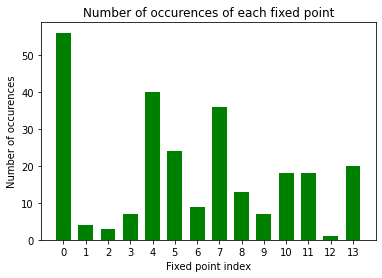

In [17]:
plt.xticks(np.arange(len(attractors)))
width = 1/1.5
plt.bar(range(len(attractors)), occurences, width, color="green")
plt.xlabel("Fixed point index")
plt.ylabel("Number of occurences")
plt.title("Number of occurences of each fixed point")
plt.show()

#### What happens when you make the starting pattern even more dissimilar to the stored ones (e.g. more than half is wrong)?

In [18]:
# These three input patterns have 5 bit errors, compared with x1, x2 and x3
x1d2 = np.array([1,1,-1,1,-1,-1,-1,1])
x2d2 = np.array([1,1,1,1,1,1,-1,-1])
x3d2 = np.array([1,-1,-1,1,1,1,-1,1])

In [19]:
patterns_d2 = np.array([x1d2, x2d2, x3d2])

In [20]:
network = HopfieldNetwork()

In [21]:
network.fit(patterns, patterns)

results = network.predict(patterns_d2)

for x in range(len(patterns)):
  print("The input patterns is ", patterns_d2[x]," , the correct pattern was ", patterns[x], " and the resulting pattern is", results[x])
  if (np.array_equal(patterns[x], results[x])):
    print("Resulting and old patterns are equal.")
  else:
        print("Resulting and old patterns are not equal.")

The input patterns is  [ 1  1 -1  1 -1 -1 -1  1]  , the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the resulting pattern is [ 1  1 -1  1 -1 -1  1 -1]
Resulting and old patterns are not equal.
The input patterns is  [ 1  1  1  1  1  1 -1 -1]  , the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  and the resulting pattern is [ 1  1 -1  1 -1 -1  1 -1]
Resulting and old patterns are not equal.
The input patterns is  [ 1 -1 -1  1  1  1 -1  1]  , the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the resulting pattern is [ 1 -1 -1  1  1 -1  1 -1]
Resulting and old patterns are not equal.


It seems that if the input patterns are very dissimilar, the memory cannot recall the stored patterns

# 3.2  Sequential Update
So far we have only used a very small 8-neuron network. Now we will switch
to a 1024-neuron network and picture patterns. Load the file pict.dat, which
contains nine 1024-dim patterns stored one after another.

In [22]:
data = np.genfromtxt('./data/pict.dat', dtype = None, delimiter = ',',encoding=None)

In [23]:
# this function separates all the data in 11 patterns of size 1024
def separate(data):
  patterns=[]
  L=[]
  for i in range(len(data)):
    if i%1024==0 and i!=0:
      patterns.append(np.array(L))
      L=[]
    L.append(data[i])
  patterns.append(np.array(L))
  return patterns

In [24]:
patterns = separate(data)

In [25]:
p1=patterns[0]
p2=patterns[1]
p3=patterns[2]
p4=patterns[3]
p5=patterns[4]
p6=patterns[5]
p7=patterns[6]
p8=patterns[7]
p9=patterns[8]
p10=patterns[9]
p11=patterns[10]

Since large patterns are hard to read as rows of numbers, please display these
1024-dim patterns as a 32 × 32 image.

In [26]:
# this function displays each pattern as a 32x32 image

def display_pattern(pattern):
  pattern=pattern.reshape(32,32)
  plt.imshow(pattern, interpolation='nearest', cmap = "gray")
  if np.array_equal(pattern,p10.reshape(32,32)) or np.array_equal(pattern,p11.reshape(32,32)):
    plt.title("Degraded pattern")
  else:
    plt.title("Pattern")
  plt.show()

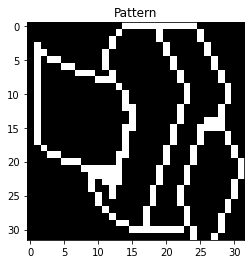

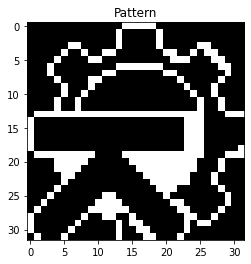

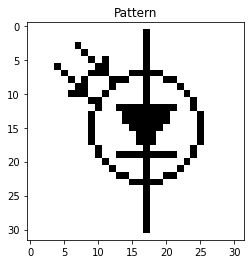

In [27]:
display_pattern(p1)
display_pattern(p2)
display_pattern(p3)

To start with, learn the first three.

In [28]:
training_patterns = np.array([p1, p2, p3])

#### Check that the three patterns are stable

In [29]:
network = HopfieldNetwork(max_iterations=8, prediction_method="sequential")

In [30]:
network.fit(training_patterns, training_patterns)
results = network.predict(training_patterns)

for x in range(len(training_patterns)):
  print("Old pattern was ", training_patterns[x]," updated pattern is ", results[x])
  if (np.array_equal(training_patterns[x],results[x])):
    print("Pattern is equal.")
  else:
        print("Pattern is not equal.")

Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1 -1 -1 ... -1 -1 -1]
Pattern is equal.
Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1 -1 -1 ... -1 -1 -1]
Pattern is equal.
Old pattern was  [1 1 1 ... 1 1 1]  updated pattern is  [1 1 1 ... 1 1 1]
Pattern is equal.


All three patterns are stable.

#### Can the network complete a degraded pattern? Try the pattern p10, which is a degraded version of p1, or p11 which is a mixture of p2 and p3.

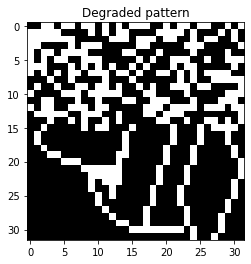

In [31]:
display_pattern(p10)

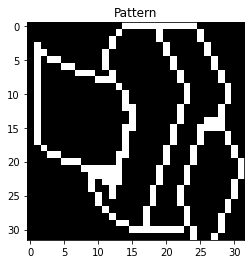

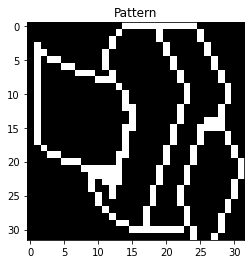

Patterns p1 and p10 are the same.


In [32]:
p10_result = network.predict(p10.reshape((1, 1024)))[0]

display_pattern(p1)
display_pattern(p10_result)
if (np.array_equal(p1, p10_result)):
    print("Patterns p1 and p10 are the same.")

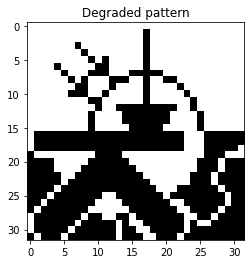

In [33]:
display_pattern(p11)

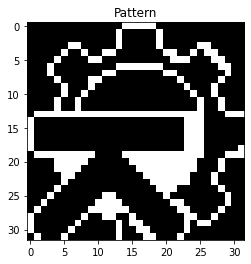

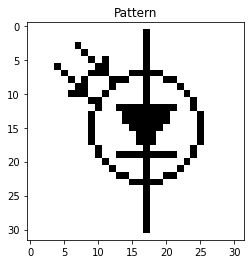

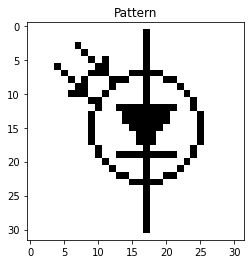

In [34]:
p11_result = network.predict(p11.reshape((1,1024)))[0]

display_pattern(p2)
display_pattern(p3)
display_pattern(p11_result)

The network is able of reconstructing the pattern into another one, in this case p3.

#### Clearly convergence is practically instantaneous. What happens if we select units randomly? Please calculate their new state and then repeat the process in the spirit of the original sequential Hopfield dynamics. Please demonstrate the image every hundredth iteration or so.


In [35]:
network0 = HopfieldNetwork(max_iterations = 1, random_weights = True, prediction_method = "sequential")
network1 = HopfieldNetwork(max_iterations = 2, random_weights = True, prediction_method = "sequential")
network2 = HopfieldNetwork(max_iterations = 3, random_weights = True, prediction_method = "sequential")
network3 = HopfieldNetwork(max_iterations = 4, random_weights = True, prediction_method = "sequential")
network4 = HopfieldNetwork(max_iterations = 5, random_weights = True, prediction_method = "sequential")
network5 = HopfieldNetwork(max_iterations = 6, random_weights = True, prediction_method = "sequential")
network6 = HopfieldNetwork(max_iterations = 7, random_weights = True, prediction_method = "sequential")
network7 = HopfieldNetwork(max_iterations = 8, random_weights = True, prediction_method = "sequential")
network8 = HopfieldNetwork(max_iterations = 9, random_weights = True, prediction_method = "sequential")
network9 = HopfieldNetwork(max_iterations = 10, random_weights = True, prediction_method = "sequential")

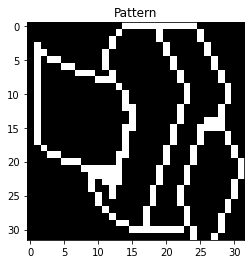

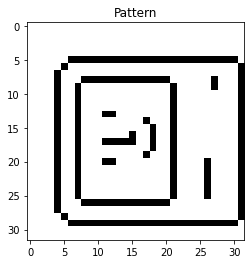

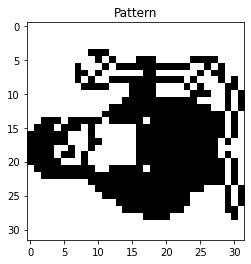

In [36]:
random_set1 = np.array([p1, p5, p8])

display_pattern(p1)
display_pattern(p5)
display_pattern(p8)

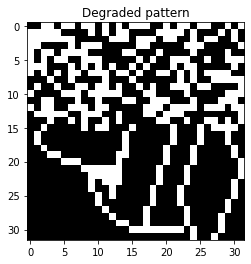

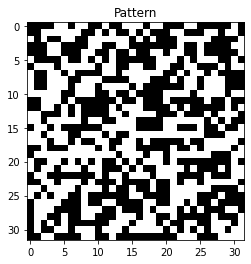

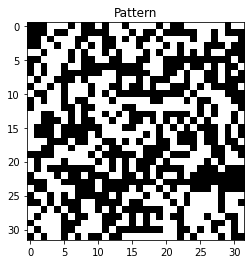

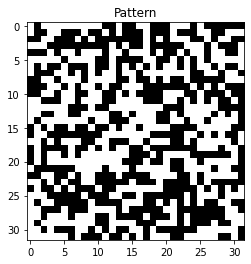

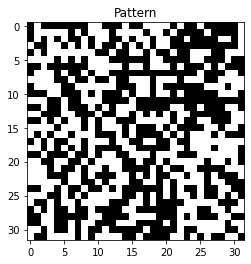

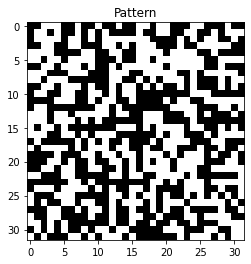

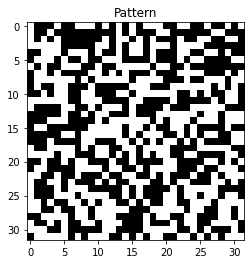

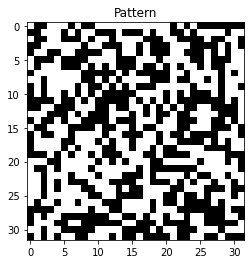

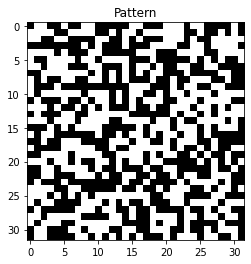

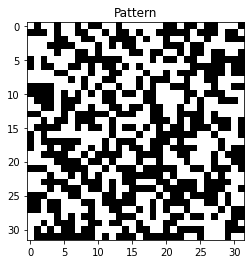

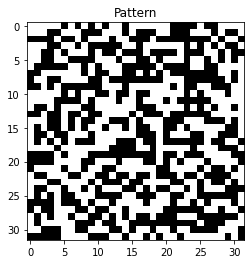

In [37]:
network0.fit(random_set1, random_set1)
network1.fit(random_set1, random_set1)
network2.fit(random_set1, random_set1)
network3.fit(random_set1, random_set1)
network4.fit(random_set1, random_set1)
network5.fit(random_set1, random_set1)
network6.fit(random_set1, random_set1)
network7.fit(random_set1, random_set1)
network8.fit(random_set1, random_set1)
network9.fit(random_set1, random_set1)

display_pattern(p10)

p10_result0 = network0.predict(p10.reshape((1,1024)))
display_pattern(p10_result0)

p10_result1 = network1.predict(p10.reshape((1,1024)))
display_pattern(p10_result1)

p10_result2 = network2.predict(p10.reshape((1,1024)))
display_pattern(p10_result2)

p10_result3 = network3.predict(p10.reshape((1,1024)))
display_pattern(p10_result3)

p10_result4 = network4.predict(p10.reshape((1,1024)))
display_pattern(p10_result4)

p10_result5 = network5.predict(p10.reshape((1,1024)))
display_pattern(p10_result5)

p10_result6 = network6.predict(p10.reshape((1,1024)))
display_pattern(p10_result6)

p10_result7 = network7.predict(p10.reshape((1,1024)))
display_pattern(p10_result7)

p10_result8 = network8.predict(p10.reshape((1,1024)))
display_pattern(p10_result8)

p10_result9 = network9.predict(p10.reshape((1,1024)))
display_pattern(p10_result9)

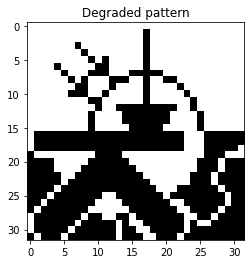

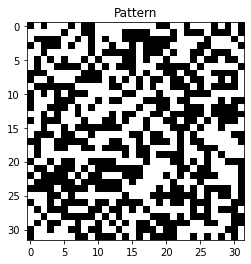

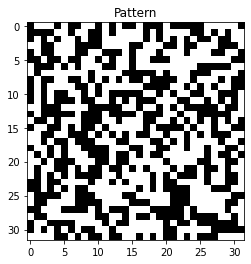

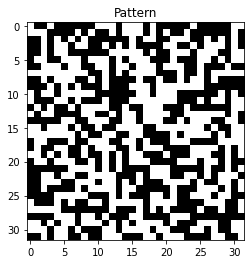

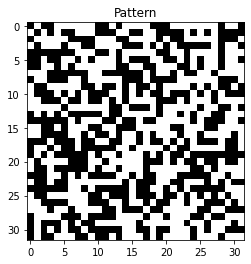

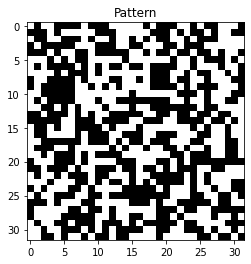

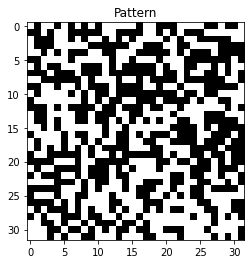

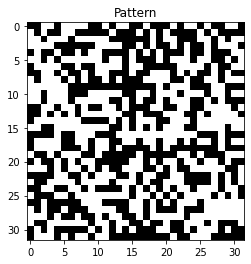

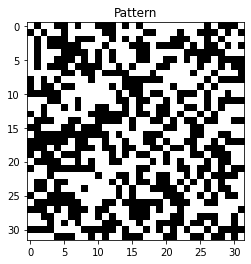

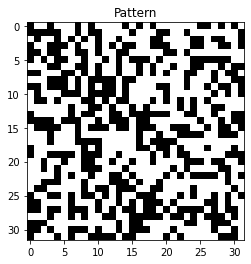

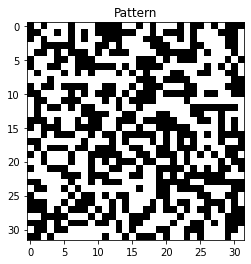

In [38]:
display_pattern(p11)

p11_result0 = network0.predict(p11.reshape((1,1024)))
display_pattern(p11_result0)

p11_result1 = network1.predict(p11.reshape((1,1024)))
display_pattern(p11_result1)

p11_result2 = network2.predict(p11.reshape((1,1024)))
display_pattern(p11_result2)

p11_result3 = network3.predict(p11.reshape((1,1024)))
display_pattern(p11_result3)

p11_result4 = network4.predict(p11.reshape((1,1024)))
display_pattern(p11_result4)

p11_result5 = network5.predict(p11.reshape((1,1024)))
display_pattern(p11_result5)

p11_result6 = network6.predict(p11.reshape((1,1024)))
display_pattern(p11_result6)

p11_result7 = network7.predict(p11.reshape((1,1024)))
display_pattern(p11_result7)

p11_result8 = network8.predict(p11.reshape((1,1024)))
display_pattern(p11_result8)

p11_result9 = network9.predict(p11.reshape((1,1024)))
display_pattern(p11_result9)

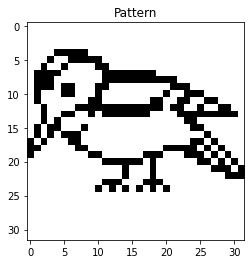

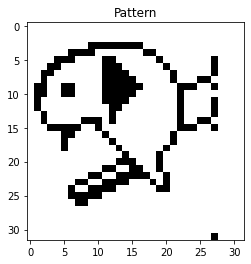

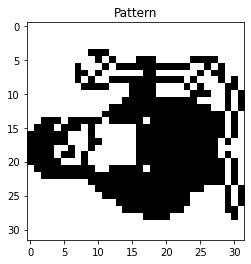

In [39]:
random_set2 = np.array([p6, p7, p8])

display_pattern(p6)
display_pattern(p7)
display_pattern(p8)

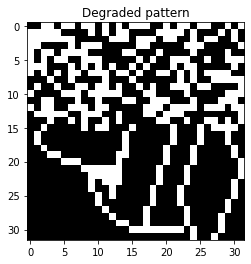

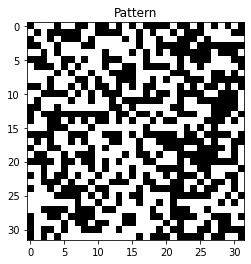

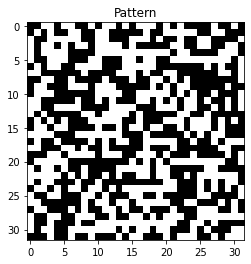

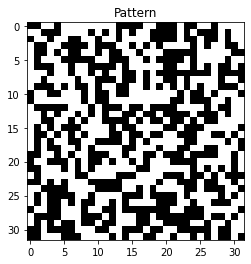

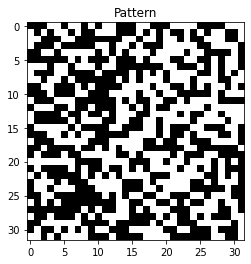

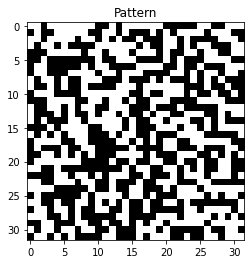

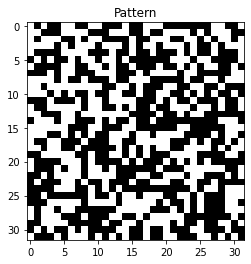

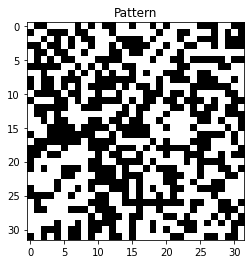

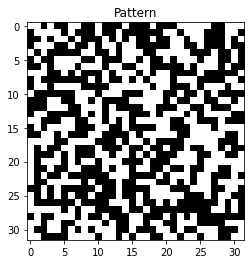

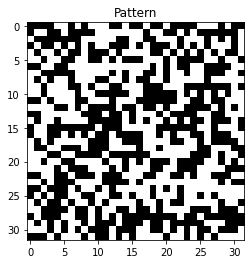

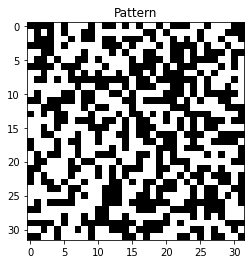

In [40]:
network0.fit(random_set2, random_set2)
network1.fit(random_set2, random_set2)
network2.fit(random_set2, random_set2)
network3.fit(random_set2, random_set2)
network4.fit(random_set2, random_set2)
network5.fit(random_set2, random_set2)
network6.fit(random_set2, random_set2)
network7.fit(random_set2, random_set2)
network8.fit(random_set2, random_set2)
network9.fit(random_set2, random_set2)

display_pattern(p10)

p10_result0 = network0.predict(p10.reshape((1,1024)))
display_pattern(p10_result0)

p10_result1 = network1.predict(p10.reshape((1,1024)))
display_pattern(p10_result1)

p10_result2 = network2.predict(p10.reshape((1,1024)))
display_pattern(p10_result2)

p10_result3 = network3.predict(p10.reshape((1,1024)))
display_pattern(p10_result3)

p10_result4 = network4.predict(p10.reshape((1,1024)))
display_pattern(p10_result4)

p10_result5 = network5.predict(p10.reshape((1,1024)))
display_pattern(p10_result5)

p10_result6 = network6.predict(p10.reshape((1,1024)))
display_pattern(p10_result6)

p10_result7 = network7.predict(p10.reshape((1,1024)))
display_pattern(p10_result7)

p10_result8 = network8.predict(p10.reshape((1,1024)))
display_pattern(p10_result8)

p10_result9 = network9.predict(p10.reshape((1,1024)))
display_pattern(p10_result9)

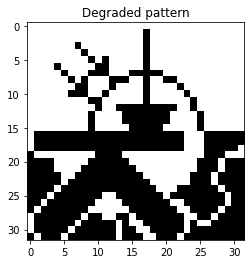

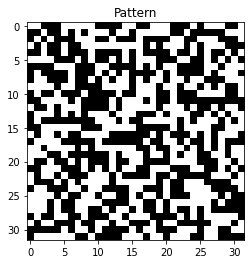

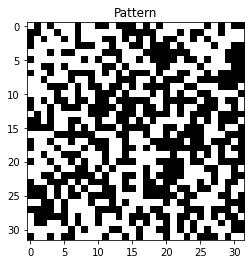

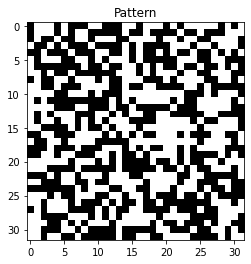

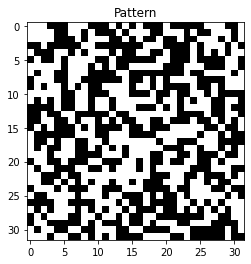

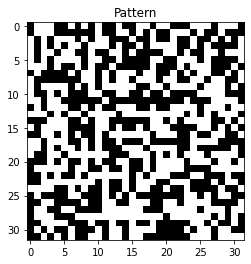

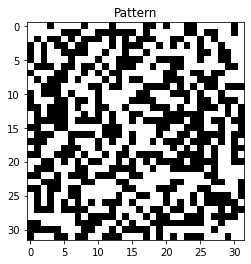

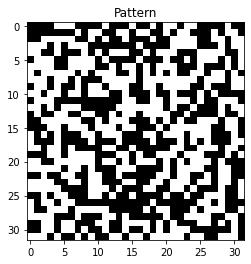

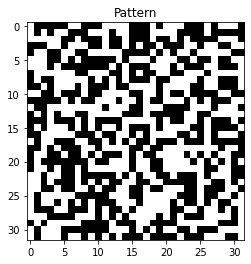

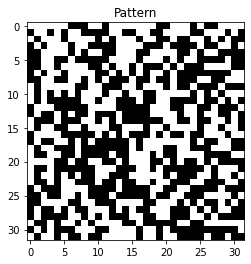

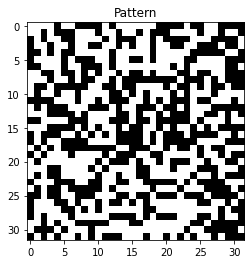

In [41]:
display_pattern(p11)

p11_result0 = network0.predict(p11.reshape((1,1024)))
display_pattern(p11_result0)

p11_result1 = network1.predict(p11.reshape((1,1024)))
display_pattern(p11_result1)

p11_result2 = network2.predict(p11.reshape((1,1024)))
display_pattern(p11_result2)

p11_result3 = network3.predict(p11.reshape((1,1024)))
display_pattern(p11_result3)

p11_result4 = network4.predict(p11.reshape((1,1024)))
display_pattern(p11_result4)

p11_result5 = network5.predict(p11.reshape((1,1024)))
display_pattern(p11_result5)

p11_result6 = network6.predict(p11.reshape((1,1024)))
display_pattern(p11_result6)

p11_result7 = network7.predict(p11.reshape((1,1024)))
display_pattern(p11_result7)

p11_result8 = network8.predict(p11.reshape((1,1024)))
display_pattern(p11_result8)

p11_result9 = network9.predict(p11.reshape((1,1024)))
display_pattern(p11_result9)

# 3.3 Energy

Can we be sure that the network converges, or will it cycle between different
states forever?
For networks with a symmetric connection matrix it is possible to define
an energy function or Lyapunov function, a finite-valued function of the state
that always decreases as the states change. Since it has to have a minimum at
least somewhere the dynamics must end up in an attractor.

In [42]:
fixed_points = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])
testing_patterns = np.array([p10, p11])

network = HopfieldNetwork(max_iterations=8, prediction_method="sequential")
network.fit(training_patterns, training_patterns)

#### What is the energy at the different attractors?

In [43]:
for i in range(len(fixed_points)):
    x = fixed_points[i].reshape((1, 1024))
    
    network.predict(x)
    energy = network.getEnergy()
    
    print("The energy at attractor p{} is {}.".format(i+1, energy[7][0][0]))

The energy at attractor p1 is -1439.390625.
The energy at attractor p2 is -1365.640625.
The energy at attractor p3 is -1462.25.
The energy at attractor p4 is -1596.01171875.
The energy at attractor p5 is -1596.01171875.
The energy at attractor p6 is -1596.01171875.
The energy at attractor p7 is -1596.01171875.
The energy at attractor p8 is -1596.01171875.
The energy at attractor p9 is -1596.01171875.


#### What is the energy at the points of the distorted patterns?

In [44]:
for i in range(len(testing_patterns)):
    x = testing_patterns[i].reshape((1, 1024))
    
    network.predict(x)
    energy = network.getEnergy()
    
    print("The energy at distorded pattern p{} is {}.".format(i+10, energy[7][0][0]))

The energy at distorded pattern p10 is -1439.390625.
The energy at distorded pattern p11 is -1462.25.


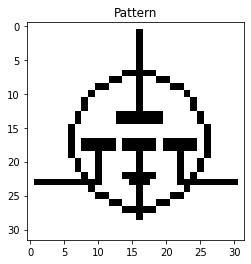

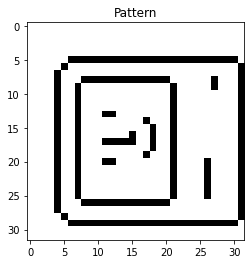

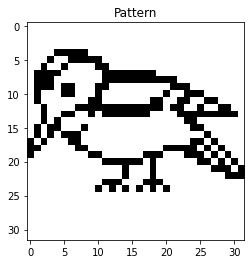

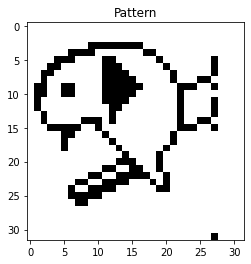

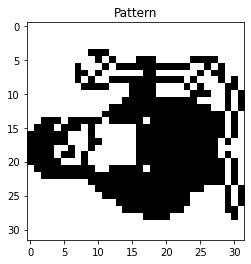

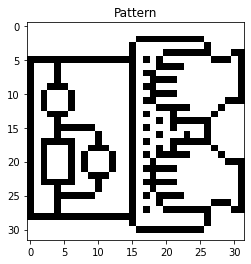

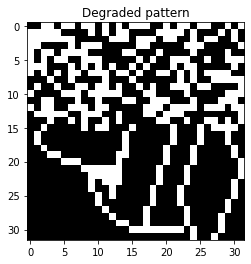

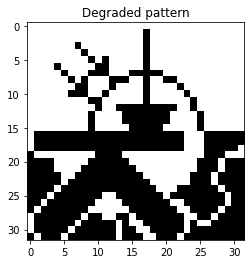

In [45]:
list = [p4, p5, p6, p7, p8, p9, p10, p11]
for i in list:
    display_pattern(i)

#### Follow how the energy changes from iteration to iteration when you use the sequential update rule to approach an attractor.

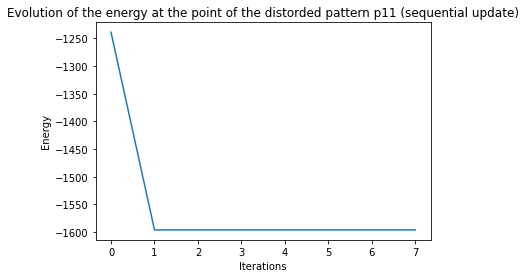

In [46]:
network.predict(p11.reshape((1,1024)))
energy = network.getEnergy()
final_energy = []
for i in range(8):
    final_energy.append(energy[i][0][0])

plt.plot(range(8), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 (sequential update)")
plt.show()

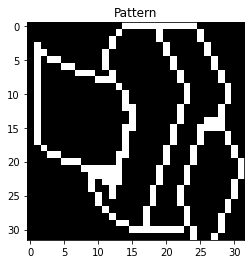

In [47]:
result = network.predict(p10.reshape((1,1024)))
display_pattern(result)

#### Generate a weight matrix by setting the weights to normally distributed random numbers, and try iterating an arbitrary starting state. What happens?

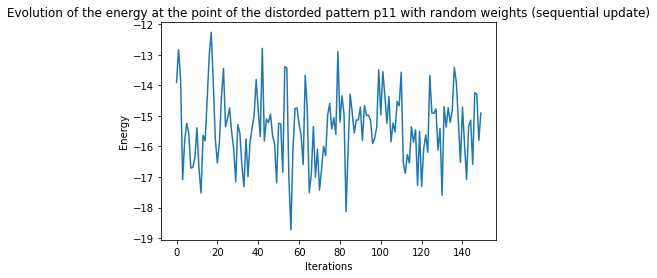

In [48]:
network = HopfieldNetwork(max_iterations = 150, prediction_method = "sequential", random_weights = True)
network.fit(training_patterns, training_patterns)
network.predict(p11.reshape((1,1024)))
energy = network.getEnergy()
final_energy = []
for i in range(150):
    final_energy.append(energy[i][0][0])

plt.plot(range(150), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 with random weights (sequential update)")
plt.show()

#### Make the weight matrix symmetric (e.g. by setting w=0.5*(w+w')). What happens now? Why?


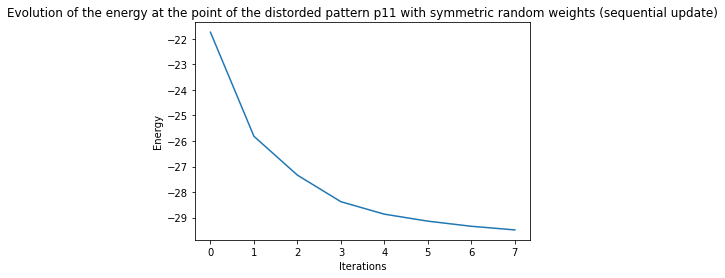

In [49]:
network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential", random_weights = True, symmetric_weights = True)
network.fit(training_patterns, training_patterns)
network.predict(p1.reshape((1,1024)))
energy = network.getEnergy()
final_energy = []
for i in range(8):
    final_energy.append(energy[i][0][0])

plt.plot(range(8), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 with symmetric random weights (sequential update)")
plt.show()

## 3.4 Distortion Resistance

The key propert studied here is the resistance of Hopfield network to noise
and distortion. In order to study the network's robustness you can generate
noisy/distorted test stimuli by randomly flipping a selected number of units,
and investigate whether the network recovers the original clean patterns that
have been used for training.

In particular, train a network with p1, p2, p3, add noise to a pattern,
iterate it a number of times and check whether it has been successfully restored.
Let the script run across 0 to 100% noise and plot the result. For speed, use
the Little model rather than asynchronous updates.

- How much noise can be removed?
- Is there any difference between the three attractors with regard to noise tolerance?
- Does the network always converge to the right attractor? Do the extra iterations (beyond a single-step recall) help? Do you notice any other attractors?

In [50]:
training_patterns = np.array([p1, p2, p3])
network = HopfieldNetwork(max_iterations=8)
network.fit(training_patterns, training_patterns)

In [51]:
def noisy_pattern(pattern, p):
  pattern_ = pattern.copy()
  idx = np.random.choice(len(pattern), int(np.ceil(len(pattern)/100 * p)), replace=False)
  pattern_[idx] = -pattern_[idx]
  return pattern_

In [52]:
percentages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for p in percentages:
  noisy_p1 = noisy_pattern(p1, p)
  p1_result = network.predict(noisy_p1)
  if (np.array_equal(p1, p1_result)):
    print('{}% noise converged to p1'.format(p))
  elif (np.array_equal(p2, p1_result)):
    print('{}% noise converged to p2'.format(p))
  elif (np.array_equal(p3, p1_result)):
    print('{}% noise converged to p3'.format(p))
  else:
    print('{}% noise was not removed'.format(p))

0% noise converged to p1
10% noise converged to p1
20% noise converged to p1
30% noise was not removed
40% noise converged to p1
50% noise was not removed
60% noise was not removed
70% noise was not removed
80% noise was not removed
90% noise was not removed
100% noise was not removed


In [53]:
for p in percentages:
  noisy_p2 = noisy_pattern(p2, p)
  p2_result = network.predict(noisy_p2)
  if (np.array_equal(p1, p2_result)):
    print('{}% noise converged to p1'.format(p))
  elif (np.array_equal(p2, p2_result)):
    print('{}% noise converged to p2'.format(p))
  elif (np.array_equal(p3, p2_result)):
    print('{}% noise converged to p3'.format(p))
  else:
    print('{}% noise was not removed'.format(p))

0% noise converged to p2
10% noise converged to p2
20% noise converged to p2
30% noise converged to p2
40% noise converged to p2
50% noise converged to p3
60% noise was not removed
70% noise was not removed
80% noise was not removed
90% noise was not removed
100% noise was not removed


In [54]:
for p in percentages:
  noisy_p3 = noisy_pattern(p3, p)
  p3_result = network.predict(noisy_p3)
  if (np.array_equal(p1, p3_result)):
    print('{}% noise converged to p1'.format(p))
  elif (np.array_equal(p2, p3_result)):
    print('{}% noise converged to p2'.format(p))
  elif (np.array_equal(p3, p3_result)):
    print('{}% noise converged to p3'.format(p))
  else:
    print('{}% noise was not removed'.format(p))

0% noise converged to p3
10% noise converged to p3
20% noise converged to p3
30% noise converged to p3
40% noise converged to p3
50% noise was not removed
60% noise was not removed
70% noise was not removed
80% noise was not removed
90% noise was not removed
100% noise was not removed


## 3.5 Capacity

Now add more and more memories to the network to see where the limit is.
Start by adding p4 into the weight matrix and check if moderately distorted
patters can still be recognized. Then continue by adding others such as p5, p6
and p7 in some order and checking the performance after each addition.

- How many patterns could safely be stored? Was the drop in performance gradual or abrupt?

In [55]:
training_patterns = np.array([p1, p2, p3, p4])
network = HopfieldNetwork(max_iterations=150)
network.fit(training_patterns, training_patterns)

In [56]:
for p in percentages:
  noisy_p1 = noisy_pattern(p3, p)
  p1_result = network.predict(noisy_p1)
  if (np.array_equal(p1, p1_result)):
    print('{}% noise converged to p1'.format(p))
  elif (np.array_equal(p2, p1_result)):
    print('{}% noise converged to p2'.format(p))
  elif (np.array_equal(p3, p1_result)):
    print('{}% noise converged to p3'.format(p))
  elif (np.array_equal(p5, p1_result)):
    print('{}% noise converged to other p'.format(p))
  else:
    print('{}% noise was not removed'.format(p))

0% noise was not removed
10% noise was not removed
20% noise was not removed
30% noise was not removed
40% noise was not removed
50% noise was not removed
60% noise was not removed
70% noise was not removed
80% noise was not removed
90% noise was not removed
100% noise was not removed


- Try to repeat this with learning a few random patterns instead of the pictures and see if you can store more.
- It has been shown that the capacity of a Hopfield network is around 0.138N. How do you explain the difference between random patterns and the pictures?

In [57]:
rp1 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp2 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp3 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp4 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp5 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp6 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp7 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp8 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp9 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp10 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)
rp11 = np.random.choice([-1, 1], 20, p=[0.5, 0.5], replace=True)

In [58]:
training_patterns = np.array([rp1, rp2])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

In [59]:
for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 1 memorized!


In [60]:
training_patterns = np.array([rp1, rp2, rp3])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 1 memorized!
Pattern 2 memorized!


In [61]:
training_patterns = np.array([rp1, rp2, rp3, rp4])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 1 memorized!
Pattern 2 memorized!
Pattern 3 memorized!


In [62]:
training_patterns = np.array([rp1, rp2, rp3, rp4, rp5])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 1 memorized!
Pattern 2 memorized!
Pattern 3 memorized!
Pattern 4 memorized!


In [63]:
training_patterns = np.array([rp1, rp2, rp3, rp4, rp5, rp6])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 1 memorized!
Pattern 2 memorized!
Pattern 3 memorized!
Pattern 4 memorized!
Pattern 5 memorized!


In [64]:
training_patterns = np.array([rp1, rp2, rp3, rp4, rp5, rp6, rp7])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 1 memorized!
Pattern 2 memorized!
Pattern 3 memorized!
Pattern 4 memorized!
Pattern 5 memorized!
Pattern 6 memorized!


In [65]:
training_patterns = np.array([rp1, rp2, rp3, rp4, rp5, rp6, rp7, rp8])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 1 memorized!
Pattern 3 memorized!
Pattern 4 memorized!
Pattern 5 memorized!
Pattern 6 memorized!
Pattern 7 memorized!


In [66]:
training_patterns = np.array([rp1, rp2, rp3, rp4, rp5, rp6, rp7, rp8, rp9])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 0 memorized!
Pattern 3 memorized!
Pattern 4 memorized!
Pattern 5 memorized!
Pattern 6 memorized!
Pattern 7 memorized!
Pattern 8 memorized!


In [67]:
training_patterns = np.array([rp1, rp2, rp3, rp4, rp5, rp6, rp7, rp8, rp9, rp10])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 3 memorized!
Pattern 4 memorized!
Pattern 6 memorized!
Pattern 7 memorized!
Pattern 8 memorized!


In [68]:
training_patterns = np.array([rp1, rp2, rp3, rp4, rp5, rp6, rp7, rp8, rp9, rp10, rp11])
network = HopfieldNetwork(max_iterations=100)
network.fit(training_patterns, training_patterns)

for i, rp in enumerate(training_patterns):
  rp_result = network.predict(rp)
  if (np.array_equal(rp, rp_result)):
    print('Pattern {} memorized!'.format(i))

Pattern 4 memorized!
Pattern 5 memorized!
Pattern 6 memorized!
Pattern 7 memorized!
Pattern 10 memorized!


Create 300 random patterns and train a 100-unit (or larger) network with
them. After each new pattern has been added to the weight matrix, calculate
how many of the earlier patterns remain stable (a single iteration does not cause
them to change) and plot it.

- What happens with the number of stable patterns as more are learned?
- What happens if convergence to the pattern from a noisy version (a few flipped units) is used? What does the dierent behavior for large number of patterns mean?

In [76]:
random_patterns = []
for i in tqdm(range(300)):
  random_patterns.append(np.random.choice([-1, 1], 100, p=[0.5, 0.5], replace=True))

  0%|          | 0/300 [00:00<?, ?it/s]

In [80]:
stable_patterns = []
for i in tqdm(range(1, 301)):
  training_patterns = random_patterns[:i]
  
  network = HopfieldNetwork(max_iterations=10)
  network.fit(training_patterns, training_patterns)
  
  n_stable_patterns = 0
  for j in range(i):
    pattern = training_patterns[j]
    result = network.predict(pattern)
    if (np.array_equal(pattern, result)):
      n_stable_patterns += 1
      
  stable_patterns.append(n_stable_patterns)

  0%|          | 0/300 [00:00<?, ?it/s]

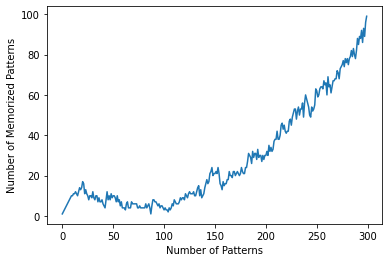

In [82]:
plt.plot(stable_patterns);
plt.xlabel('Number of Patterns')
plt.ylabel('Number of Memorized Patterns');

In [83]:
stable_patterns = []
for i in tqdm(range(1, 301)):
  training_patterns = random_patterns[:i]
  
  network = HopfieldNetwork(max_iterations=10)
  network.fit(training_patterns, training_patterns)
  
  n_stable_patterns = 0
  for j in range(i):
    pattern = random_patterns[j]
    noisy = noisy_pattern(pattern, 10)
    result = network.predict(noisy)
    if (np.array_equal(pattern, result)):
      n_stable_patterns += 1
      
  stable_patterns.append(n_stable_patterns)

  0%|          | 0/300 [00:00<?, ?it/s]

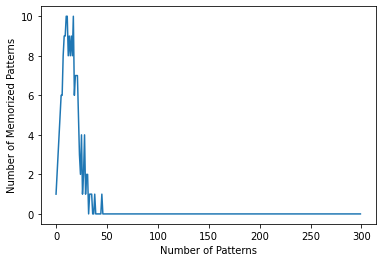

In [84]:
plt.plot(stable_patterns);
plt.xlabel('Number of Patterns')
plt.ylabel('Number of Memorized Patterns');

The self-connections wii are always positive and quite strong; they always
support units to remain at their current state. If you remove them and compare
the curves from pure and noisy patterns for large number of patterns you will
see that the difference goes away. In general it is a good idea to remove selfconnections, even though it seems that this step lowers the memory performance.

In fact, self-connections promote the formation of spurious patterns and have
negative effect on noise removal capabilities.

- What is the maximum number of retrievable patterns for this network?


In [85]:
stable_patterns = []
for i in tqdm(range(1, 301)):
  training_patterns = random_patterns[:i]
  
  network = HopfieldNetwork(max_iterations=10, self_connections=False)
  network.fit(training_patterns, training_patterns)
  
  n_stable_patterns = 0
  for j in range(i):
    pattern = random_patterns[j]
    noisy = noisy_pattern(pattern, 10)
    result = network.predict(noisy)
    if (np.array_equal(pattern, result)):
      n_stable_patterns += 1
      
  stable_patterns.append(n_stable_patterns)

  0%|          | 0/300 [00:00<?, ?it/s]

Maximum number of memorized patterns: 10


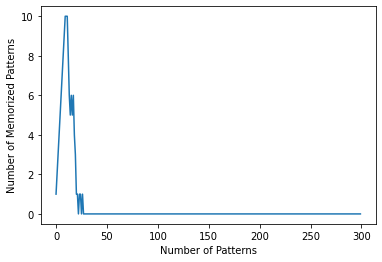

In [86]:
plt.plot(stable_patterns);
plt.xlabel('Number of Patterns')
plt.ylabel('Number of Memorized Patterns')

print('Maximum number of memorized patterns: {}'.format(np.max(stable_patterns)))

- What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100)) or something similar to make them contain more +1? How does this relate to the capacity results of the picture patterns?

In [94]:
random_patterns = []
for i in tqdm(range(300)):
  random_patterns.append(np.sign(0.5 + np.random.normal(1, 2, 300)))

  0%|          | 0/300 [00:00<?, ?it/s]

In [96]:
stable_patterns = []
for i in tqdm(range(1, 301)):
  training_patterns = random_patterns[:i]
  
  network = HopfieldNetwork(max_iterations=10, self_connections=False)
  network.fit(training_patterns, training_patterns)
  
  n_stable_patterns = 0
  for j in range(i):
    pattern = random_patterns[j]
    noisy = noisy_pattern(pattern, 10)
    result = network.predict(noisy)
    if (np.array_equal(pattern, result)):
      n_stable_patterns += 1
      
  stable_patterns.append(n_stable_patterns)

  0%|          | 0/300 [00:00<?, ?it/s]

Maximum number of memorized patterns: 3


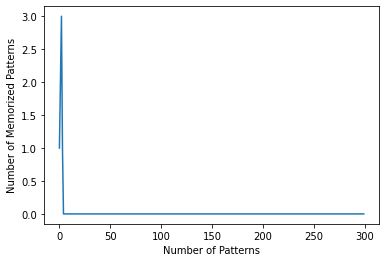

In [97]:
plt.plot(stable_patterns);
plt.xlabel('Number of Patterns')
plt.ylabel('Number of Memorized Patterns')

print('Maximum number of memorized patterns: {}'.format(np.max(stable_patterns)))

In [ ]:
stable_patterns = []
for i in tqdm(range(1, 301)):
  training_patterns = random_patterns[:i]
  
  network = HopfieldNetwork(max_iterations=10)
  network.fit(training_patterns, training_patterns)
  
  n_stable_patterns = 0
  for j in range(i):
    pattern = random_patterns[j]
    result = network.predict(pattern)
    if (np.array_equal(pattern, result)):
      n_stable_patterns += 1
      
  stable_patterns.append(n_stable_patterns)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
plt.plot(stable_patterns);
plt.xlabel('Number of Patterns')
plt.ylabel('Number of Memorized Patterns')

print('Maximum number of memorized patterns: {}'.format(np.max(stable_patterns)))